In [1]:
from pangolin.interface import *
import pangolin.calculate
calc = pangolin.calculate.Calculate('numpyro',niter=1000000)
from matplotlib import pyplot as plt

In [2]:
x = normal(0,2)
calc.E(x)

-0.0006508680985904472

In [3]:
x = normal(0,2)
y = normal(x,3)
calc.E(y)

0.000990522924114023

In [4]:
calc.E(y,x,7)

6.998515018267448

In [5]:
calc.E([x,y],x,7)

[7.0, 6.998216828786084]

In [6]:
calc.E({"bananas":2*x, "pizza":y},{"coffee":x},{"coffee":7})

{'bananas': 14.0, 'pizza': 6.999163544975443}

In [7]:
print('expected variance:', 2**2+3**2)
calc.var(y)

expected variance: 13


12.998516822020882

In [8]:
print('expected conditional variance:', 3**2)
calc.var(y,x,12)

expected conditional variance: 9


9.001404094800938

In [9]:
print('expected std dev:', (2**2+3**2)**0.5)
calc.std(y)

expected std dev: 3.605551275463989


3.606065096806742

In [10]:
calc.E(x,y,7)

2.1526341341744923

In [11]:
calc.E(normal(0,1))

-0.0003462042439334906

true w [ 0.83094794  1.35770074 -2.36578117  2.38246634 -1.58022869]
posterior mean [ 0.83709494  1.27764044 -2.42298194  2.34169293 -1.59022352]


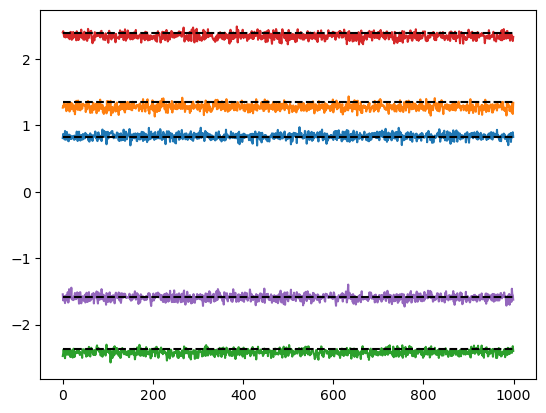

In [12]:
# simple linear regression
ndims = 5
ndata = 500
# generate data
w_true = np.random.randn(ndims)
X = np.random.randn(ndata,ndims)
y_obs = X @ w_true + np.random.randn(ndata)

# model
w = plate(N=ndims)(lambda:
                   normal_scale(0,1))
y = plate(X)(lambda x_i:
               normal_scale(w @ x_i, 1))

calc = pangolin.Calculate('numpyro',niter=1000)
print('true w', w_true)
print('posterior mean', calc.E(w,y,y_obs))

ws = calc.sample(w, y, y_obs)

plt.plot(ws)
for i in range(ndims):
    plt.plot([0,1000],[w_true[i], w_true[i]],'k--')